In [52]:
import pandas as pd
df = pd.read_csv('C:/Users/sathv/Downloads/US_Accidents.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

Text(0.5, 1.0, '% of Missing Values in each Attribute')

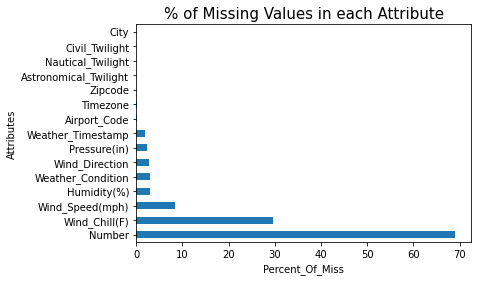

In [74]:
percent_of_miss = df.isna().sum().sort_values(ascending=False) / len(df)
percent_of_miss = percent_of_miss *100
percent_of_miss[percent_of_miss != 0].plot(kind = 'barh')
plt.xlabel('Percent_Of_Miss',fontsize=10)
plt.ylabel('Attributes',fontsize=10)
plt.title('% of Missing Values in each Attribute',fontsize=15)

In [55]:
Precipitation = df['Precipitation(in)']
len(Precipitation[Precipitation == 0])

903429

In [56]:
import numpy as np
df['Precipitation(in)'] = df['Precipitation(in)'].replace(to_replace = np.nan, value = 0 )
df['Temperature(F)'] = df['Temperature(F)'].interpolate()
df['Visibility(mi)'] = df['Visibility(mi)'].interpolate()
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].bfill()

Text(0.5, 1.0, 'Top 20 Cities with most no of Accidents')

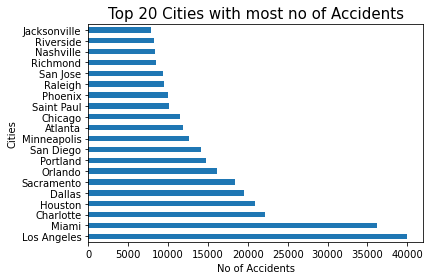

In [75]:
City = df['City'].value_counts()
City[:20].plot(kind = 'barh')
plt.xlabel('No of Accidents',fontsize=10)
plt.ylabel('Cities',fontsize=10)
plt.title('Top 20 Cities with most no of Accidents',fontsize=15)

Text(0.5, 1.0, 'Top 15 States with most no of Accidents')

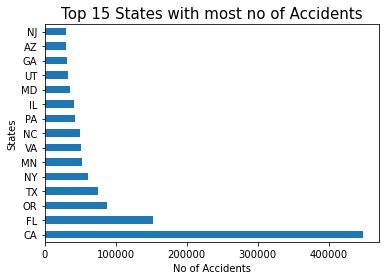

In [76]:
State = df['State'].value_counts()
State[:15].plot(kind = 'barh')
plt.xlabel('No of Accidents',fontsize=10)
plt.ylabel('States',fontsize=10)
plt.title('Top 15 States with most no of Accidents',fontsize=15)

In [59]:
High_acci_Cities = City[City >= 500]
High_acci_States = State[State < 500]
len(High_acci_Cities) / len(City)

#only 5% of cities haev less then 500 yearly accidents

0.05114009571173876

Text(0, 0.5, 'Count')

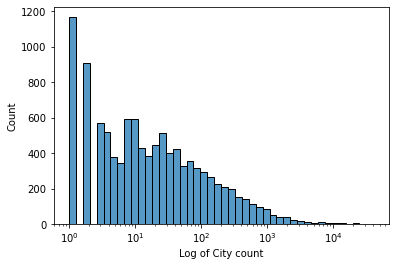

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(City,log_scale=True)
plt.xlabel('Log of City count',fontsize=10)
plt.ylabel('Count',fontsize=10)

#Majority of the cities have only 1 accident and no_of_accidents per city decreases exponentially

Text(0.5, 1.0, 'No of Accidents per Day')

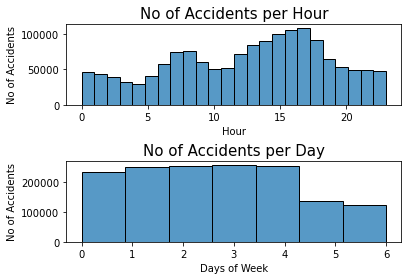

In [85]:
df.Start_Time = pd.to_datetime(df.Start_Time)
plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 1)
sns.histplot(df.Start_Time.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents per Hour',fontsize=15)
plt.subplot(2, 1, 2)
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)
plt.xlabel('Days of Week',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents per Day',fontsize=15)

Text(0.5, 1.0, 'No of Accidents on Mondays')

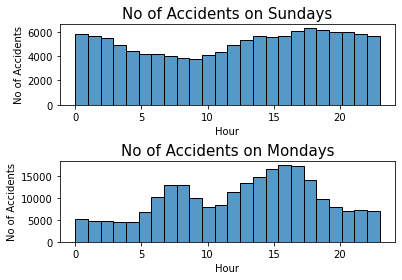

In [86]:
plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 1)
sunday_timings = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sunday_timings.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents on Sundays',fontsize=15)
plt.subplot(2, 1, 2)
monday_timings = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(monday_timings.dt.hour,bins=24)
plt.xlabel('Hour',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents on Mondays',fontsize=15)

In [63]:
df['Severity_group'] = 0
df.loc[df['Severity'] == 4 , 'Severity_group'] = 1
df.loc[df['Severity'] == 3 , 'Severity_group'] = 1
#df = df.drop(['Severity'], axis = 1)
df.Severity_group.value_counts()

0    1240560
1     275504
Name: Severity_group, dtype: int64

Text(0.5, 1.0, 'No of Accidents based on Sunrise & Sunset with Severity')

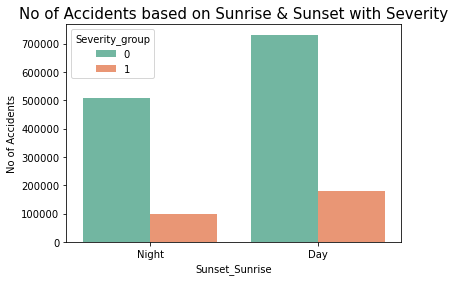

In [87]:
sns.countplot(x='Sunrise_Sunset', hue='Severity_group', data=df ,palette="Set2")
plt.xlabel('Sunset_Sunrise',fontsize=10)
plt.ylabel('No of Accidents',fontsize=10)
plt.title('No of Accidents based on Sunrise & Sunset with Severity',fontsize=15)

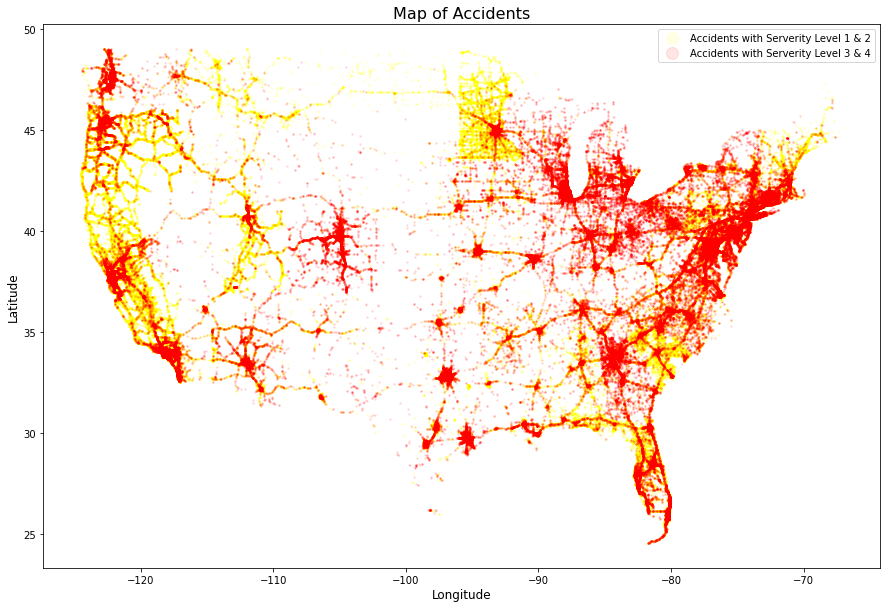

In [65]:
df_group1 = df[df['Severity_group']==0]
df_group2 = df[df['Severity_group']==1]
plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df_group1, linestyle='', marker='o', markersize=1.5, color="yellow", alpha=0.1, label='Accidents with Serverity Level 1 & 2')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_group2, linestyle='', marker='o', markersize=1.5, color="red", alpha=0.1, label='Accidents with Serverity Level 3 & 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1)
plt.show()

In [66]:
df['Weather_Condition'].value_counts()[:25]
df['Weather_Condition_Group'] = 'Unsafe for Driving'
df.loc[df['Weather_Condition'] == 'Fair' , 'Weather_Condition_Group'] = 'Perfect weather for driving'
df.loc[df['Weather_Condition'] == 'Clear' , 'Weather_Condition_Group'] = 'Perfect weather for driving'
df.Weather_Condition_Group.value_counts()

Unsafe for Driving             870589
Perfect weather for driving    645475
Name: Weather_Condition_Group, dtype: int64

Text(0.5, 1.0, 'Top 5 Weather Conditions for accidents')

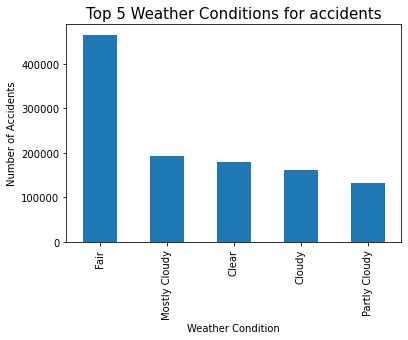

In [95]:
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=10)
plt.ylabel('Number of Accidents',fontsize=10)
plt.title('Top 5 Weather Conditions for accidents',fontsize=15)